## analysis and visualization of data

In [24]:
import pandas as pd
import numpy as np

%pylab inline
import seaborn as sns

train_df = pd.read_csv('pubg_train.csv')
test_df = pd.read_csv('pubg_test.csv')

Populating the interactive namespace from numpy and matplotlib


In [25]:
train_df.shape, test_df.shape

((1500000, 16), (500000, 15))

In [26]:
train_df.head()

,match_id,team_id,game_size,party_size,player_assists,player_dbno,player_dist_ride,player_dist_walk,player_dmg,player_kills,player_name,kill_distance_x_min,kill_distance_x_max,kill_distance_y_min,kill_distance_y_max,team_placement
0,0,1,50,2,0,1,4984.54900,2054.031490,218,2,0,1689.9,3992.9,137.0,819.8,5
1,0,1,50,2,1,0,5960.46436,2268.221000,125,0,1,NaN,NaN,NaN,NaN,5
2,0,2,50,2,0,0,0.00000,0.000000,0,0,2,NaN,NaN,NaN,NaN,49
3,0,2,50,2,0,0,0.00000,5.211829,41,0,3,NaN,NaN,NaN,NaN,49
4,0,3,50,2,0,0,0.00000,341.730927,69,0,4,NaN,NaN,NaN,NaN,34


<AxesSubplot:>

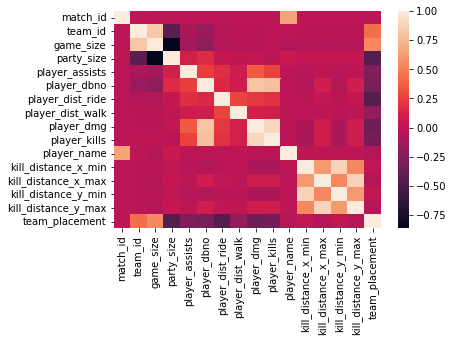

In [27]:
sns.heatmap(train_df.corr())

## auto!

### training

In [28]:
from autogluon.tabular import TabularDataset, TabularPredictor

train_data = TabularDataset('pubg_train.csv')
train_data

Loaded data from: pubg_train.csv | Columns = 16 / 16 | Rows = 1500000 -> 1500000


,match_id,team_id,game_size,party_size,player_assists,player_dbno,player_dist_ride,player_dist_walk,player_dmg,player_kills,player_name,kill_distance_x_min,kill_distance_x_max,kill_distance_y_min,kill_distance_y_max,team_placement
0,0,1,50,2,0,1,4984.54900,2054.031490,218,2,0,1689.9,3992.9,137.0,819.8,5
1,0,1,50,2,1,0,5960.46436,2268.221000,125,0,1,NaN,NaN,NaN,NaN,5
2,0,2,50,2,0,0,0.00000,0.000000,0,0,2,NaN,NaN,NaN,NaN,49
3,0,2,50,2,0,0,0.00000,5.211829,41,0,3,NaN,NaN,NaN,NaN,49
4,0,3,50,2,0,0,0.00000,341.730927,69,0,4,NaN,NaN,NaN,NaN,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1499995,14999,4,28,4,0,1,0.00000,2236.734620,284,0,992602,NaN,NaN,NaN,NaN,10
1499996,14999,26,28,4,0,2,0.00000,700.453100,225,0,992603,NaN,NaN,NaN,NaN,20
1499997,14999,26,28,4,0,1,0.00000,861.909600,40,1,992604,259.3,259.3,76.7,76.7,20
1499998,14999,26,28,4,0,0,0.00000,844.545837,134,0,992605,NaN,NaN,NaN,NaN,20


In [29]:
from sklearn.metrics import mean_absolute_error

y_pred = [0, 2, 1, 3]
y_true = [0, 1, 2, 3]

mean_absolute_error(y_true, y_pred)

0.5

In [30]:
from sklearn.metrics import mean_absolute_error
from autogluon.core.metrics import make_scorer

ag_mean_absolute_error_scorer = make_scorer(name='mean_absolute_error',
                                            score_func=mean_absolute_error,
                                            optimum=0,
                                            greater_is_better=False)

ag_mean_absolute_error_scorer(y_true, y_pred)

-0.5

In [31]:
label = 'team_placement'
predictor = TabularPredictor(label=label, problem_type='regression', eval_metric=ag_mean_absolute_error_scorer).fit(
    train_data.drop(columns=['match_id', 'team_id', 'player_name']),
    # num_bag_folds=5,
    # num_bag_sets=1,
    # num_stack_levels=1,
    auto_stack=True,
    presets='best_quality',
    # ag_args_fit={'num_gpus': 2}
)

No path specified. Models will be saved in: "AutogluonModels/ag-20220511_035609/"
Presets specified: ['best_quality']
	Consider setting `time_limit` to ensure training finishes within an expected duration or experiment with a small portion of `train_data` to identify an ideal `presets` and `hyperparameters` configuration.
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/ag-20220511_035609/"
AutoGluon Version:  0.3.1
Train Data Rows:    1500000
Train Data Columns: 12
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    41914.08 MB
	Train Data (Original)  Memory Usage: 144.0 MB (0.3% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage

[1000]	train_set's l1: 4.73191	valid_set's l1: 4.73256
[2000]	train_set's l1: 4.71872	valid_set's l1: 4.72928
[3000]	train_set's l1: 4.70909	valid_set's l1: 4.72802
[4000]	train_set's l1: 4.70093	valid_set's l1: 4.72775


/home/y212202031/.conda/envs/lium_torch/lib/python3.6/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's l1: 4.73043	valid_set's l1: 4.74188
[2000]	train_set's l1: 4.71718	valid_set's l1: 4.73904
[3000]	train_set's l1: 4.70747	valid_set's l1: 4.73869


/home/y212202031/.conda/envs/lium_torch/lib/python3.6/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's l1: 4.729	valid_set's l1: 4.7545
[2000]	train_set's l1: 4.71617	valid_set's l1: 4.75069
[3000]	train_set's l1: 4.70658	valid_set's l1: 4.74948
[4000]	train_set's l1: 4.69828	valid_set's l1: 4.74905
[5000]	train_set's l1: 4.69099	valid_set's l1: 4.74891
[6000]	train_set's l1: 4.68412	valid_set's l1: 4.74901


/home/y212202031/.conda/envs/lium_torch/lib/python3.6/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's l1: 4.7328	valid_set's l1: 4.73715
[2000]	train_set's l1: 4.7193	valid_set's l1: 4.73395
[3000]	train_set's l1: 4.70945	valid_set's l1: 4.73313


/home/y212202031/.conda/envs/lium_torch/lib/python3.6/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's l1: 4.73216	valid_set's l1: 4.74153
[2000]	train_set's l1: 4.71867	valid_set's l1: 4.73825
[3000]	train_set's l1: 4.70881	valid_set's l1: 4.73703
[4000]	train_set's l1: 4.70032	valid_set's l1: 4.73664


/home/y212202031/.conda/envs/lium_torch/lib/python3.6/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's l1: 4.73245	valid_set's l1: 4.72504
[2000]	train_set's l1: 4.71948	valid_set's l1: 4.72169
[3000]	train_set's l1: 4.70981	valid_set's l1: 4.7206
[4000]	train_set's l1: 4.70155	valid_set's l1: 4.72013


/home/y212202031/.conda/envs/lium_torch/lib/python3.6/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's l1: 4.73129	valid_set's l1: 4.74441
[2000]	train_set's l1: 4.71842	valid_set's l1: 4.74085
[3000]	train_set's l1: 4.70864	valid_set's l1: 4.73971
[4000]	train_set's l1: 4.70034	valid_set's l1: 4.73912
[5000]	train_set's l1: 4.69296	valid_set's l1: 4.73924


/home/y212202031/.conda/envs/lium_torch/lib/python3.6/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's l1: 4.73008	valid_set's l1: 4.74074
[2000]	train_set's l1: 4.7176	valid_set's l1: 4.73725
[3000]	train_set's l1: 4.70841	valid_set's l1: 4.7361
[4000]	train_set's l1: 4.70034	valid_set's l1: 4.7359


/home/y212202031/.conda/envs/lium_torch/lib/python3.6/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's l1: 4.73014	valid_set's l1: 4.73959
[2000]	train_set's l1: 4.71734	valid_set's l1: 4.73542
[3000]	train_set's l1: 4.70778	valid_set's l1: 4.73424
[4000]	train_set's l1: 4.69936	valid_set's l1: 4.73387


/home/y212202031/.conda/envs/lium_torch/lib/python3.6/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's l1: 4.7285	valid_set's l1: 4.76108
[2000]	train_set's l1: 4.71553	valid_set's l1: 4.75807
[3000]	train_set's l1: 4.70596	valid_set's l1: 4.75724
[4000]	train_set's l1: 4.69763	valid_set's l1: 4.75721


	-4.737	 = Validation score   (mean_absolute_error)
	731.45s	 = Training   runtime
	45.01s	 = Validation runtime
Fitting model: LightGBM_BAG_L1 ...
/home/y212202031/.conda/envs/lium_torch/lib/python3.6/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's l1: 4.70453	valid_set's l1: 4.72624
[2000]	train_set's l1: 4.67918	valid_set's l1: 4.72528


/home/y212202031/.conda/envs/lium_torch/lib/python3.6/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's l1: 4.70307	valid_set's l1: 4.73717


/home/y212202031/.conda/envs/lium_torch/lib/python3.6/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's l1: 4.70159	valid_set's l1: 4.74671


/home/y212202031/.conda/envs/lium_torch/lib/python3.6/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's l1: 4.70458	valid_set's l1: 4.7298


/home/y212202031/.conda/envs/lium_torch/lib/python3.6/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's l1: 4.70432	valid_set's l1: 4.73357
[2000]	train_set's l1: 4.67876	valid_set's l1: 4.73284


/home/y212202031/.conda/envs/lium_torch/lib/python3.6/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's l1: 4.70557	valid_set's l1: 4.71828


/home/y212202031/.conda/envs/lium_torch/lib/python3.6/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's l1: 4.70392	valid_set's l1: 4.73626


/home/y212202031/.conda/envs/lium_torch/lib/python3.6/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's l1: 4.70347	valid_set's l1: 4.73636


/home/y212202031/.conda/envs/lium_torch/lib/python3.6/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's l1: 4.70319	valid_set's l1: 4.73482
[2000]	train_set's l1: 4.67746	valid_set's l1: 4.73442


/home/y212202031/.conda/envs/lium_torch/lib/python3.6/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's l1: 4.70155	valid_set's l1: 4.75492


	-4.7349	 = Validation score   (mean_absolute_error)
	307.65s	 = Training   runtime
	13.37s	 = Validation runtime
Fitting model: RandomForestMSE_BAG_L1 ...
	-5.1855	 = Validation score   (mean_absolute_error)
	96.65s	 = Training   runtime
	22.87s	 = Validation runtime
Fitting model: CatBoost_BAG_L1 ...
	-4.7348	 = Validation score   (mean_absolute_error)
	363.93s	 = Training   runtime
	0.43s	 = Validation runtime
Fitting model: ExtraTreesMSE_BAG_L1 ...
	-5.1848	 = Validation score   (mean_absolute_error)
	30.2s	 = Training   runtime
	20.7s	 = Validation runtime
Fitting model: NeuralNetFastAI_BAG_L1 ...
No improvement since epoch 1: early stopping
No improvement since epoch 0: early stopping
No improvement since epoch 0: early stopping
No improvement since epoch 6: early stopping
No improvement since epoch 0: early stopping
	-4.8823	 = Validation score   (mean_absolute_error)
	20862.82s	 = Training   runtime
	21.12s	 = Validation runtime
Fitting model: XGBoost_BAG_L1 ...
	-4.7378	 = Val

[1000]	train_set's l1: 4.65601	valid_set's l1: 4.7344


/home/y212202031/.conda/envs/lium_torch/lib/python3.6/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
	-4.7348	 = Validation score   (mean_absolute_error)
	301.38s	 = Training   runtime
	10.88s	 = Validation runtime
Fitting model: WeightedEnsemble_L2 ...
	-4.7304	 = Validation score   (mean_absolute_error)
	17.42s	 = Training   runtime
	0.01s	 = Validation runtime
Fitting 9 L2 models ...
Fitting model: LightGBMXT_BAG_L2 ...
/home/y212202031/.conda/envs/lium_torch/lib/python3.6/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument

[1000]	train_set's l1: 4.71845	valid_set's l1: 4.75374


/home/y212202031/.conda/envs/lium_torch/lib/python3.6/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's l1: 4.72058	valid_set's l1: 4.72921


/home/y212202031/.conda/envs/lium_torch/lib/python3.6/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's l1: 4.71843	valid_set's l1: 4.74057


/home/y212202031/.conda/envs/lium_torch/lib/python3.6/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's l1: 4.72194	valid_set's l1: 4.71454


/home/y212202031/.conda/envs/lium_torch/lib/python3.6/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's l1: 4.72084	valid_set's l1: 4.72311
[2000]	train_set's l1: 4.70732	valid_set's l1: 4.72253


/home/y212202031/.conda/envs/lium_torch/lib/python3.6/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's l1: 4.72034	valid_set's l1: 4.73012


/home/y212202031/.conda/envs/lium_torch/lib/python3.6/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's l1: 4.72003	valid_set's l1: 4.72943
[2000]	train_set's l1: 4.70741	valid_set's l1: 4.72922


/home/y212202031/.conda/envs/lium_torch/lib/python3.6/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's l1: 4.71896	valid_set's l1: 4.73988


/home/y212202031/.conda/envs/lium_torch/lib/python3.6/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's l1: 4.71875	valid_set's l1: 4.74842
[2000]	train_set's l1: 4.70577	valid_set's l1: 4.74801


/home/y212202031/.conda/envs/lium_torch/lib/python3.6/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's l1: 4.71961	valid_set's l1: 4.73642


	-4.7341	 = Validation score   (mean_absolute_error)
	413.08s	 = Training   runtime
	18.43s	 = Validation runtime
Fitting model: LightGBM_BAG_L2 ...
/home/y212202031/.conda/envs/lium_torch/lib/python3.6/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
/home/y212202031/.conda/envs/lium_torch/lib/python3.6/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
/home/y212202031/.conda/envs/lium_torch/lib/python3.6/site-packages/lightgbm/engine.py:239: UserWarning: 'v

In [32]:
predictor.leaderboard()

                     model  score_val  pred_time_val      fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -4.707665     460.986603  45780.307445                0.013547          15.639315            3       True         20
1   NeuralNetFastAI_BAG_L2  -4.709468     434.397682  45049.491914               17.344459       18730.901650            2       True         17
2      WeightedEnsemble_L2  -4.730412     352.376257   5346.331840                0.013417          17.416987            2       True         11
3          LightGBM_BAG_L2  -4.730960     420.349594  26439.675067                3.296371         121.084803            2       True         13
4           XGBoost_BAG_L2  -4.731043     419.357098  26404.125583                2.303875          85.535319            2       True         18
5     LightGBMLarge_BAG_L2  -4.731583     422.899698  26535.150748                5.846475         216.560484            2       T

,model,score_val,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L3,-4.707665,460.986603,45780.307445,0.013547,15.639315,3,True,20
1,NeuralNetFastAI_BAG_L2,-4.709468,434.397682,45049.491914,17.344459,18730.901650,2,True,17
2,WeightedEnsemble_L2,-4.730412,352.376257,5346.331840,0.013417,17.416987,2,True,11
3,LightGBM_BAG_L2,-4.730960,420.349594,26439.675067,3.296371,121.084803,2,True,13
4,XGBoost_BAG_L2,-4.731043,419.357098,26404.125583,2.303875,85.535319,2,True,18
5,LightGBMLarge_BAG_L2,-4.731583,422.899698,26535.150748,5.846475,216.560484,2,True,19
6,CatBoost_BAG_L2,-4.733223,417.453699,26504.693354,0.400476,186.103091,2,True,15
7,LightGBMXT_BAG_L2,-4.734127,435.478247,26731.670677,18.425025,413.080413,2,True,12
8,LightGBMLarge_BAG_L1,-4.734752,10.879455,301.380927,10.879455,301.380927,1,True,10
9,CatBoost_BAG_L1,-4.734848,0.432436,363.927224,0.432436,363.927224,1,True,6


In [33]:
predictor.feature_importance(train_data)

Computing feature importance via permutation shuffling for 15 features using 1000 rows with 3 shuffle sets...
	5299.23s	= Expected runtime (1766.41s per shuffle set)
	326.51s	= Actual runtime (Completed 3 of 3 shuffle sets)


,importance,stddev,p_value,n,p99_high,p99_low
player_dist_walk,7.504378e+00,5.306826e-01,0.000831,3,1.054525e+01,4.463508e+00
game_size,3.115942e+00,1.764681e-01,0.000534,3,4.127124e+00,2.104760e+00
player_dist_ride,1.221416e+00,1.258465e-01,0.001760,3,1.942530e+00,5.003018e-01
party_size,1.119907e+00,1.927165e-01,0.004864,3,2.224194e+00,1.562055e-02
player_dmg,2.510933e-01,3.100047e-02,0.002521,3,4.287294e-01,7.345715e-02
player_kills,1.623873e-01,8.049313e-02,0.036521,3,6.236219e-01,-2.988473e-01
player_dbno,6.012377e-02,2.987010e-02,0.036669,3,2.312827e-01,-1.110352e-01
kill_distance_x_max,4.620117e-02,2.191474e-02,0.033746,3,1.717751e-01,-7.937272e-02
player_assists,4.462662e-02,9.934543e-03,0.008060,3,1.015527e-01,-1.229941e-02
kill_distance_y_max,3.981248e-02,1.035328e-02,0.010904,3,9.913795e-02,-1.951299e-02


### prediction

In [34]:
import pandas as pd

test_data = TabularDataset('pubg_test.csv')

Loaded data from: pubg_test.csv | Columns = 15 / 15 | Rows = 500000 -> 500000


In [35]:
preds = predictor.predict(test_data.drop(columns=['match_id', 'team_id', 'player_name']))
submission = pd.DataFrame({label:preds}).to_csv('submission.csv', index=None)

In [36]:
!zip submission.zip submission.csv

  adding: submission.csv (deflated 55%)
